In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("./star_classification.csv")

In [3]:
df1.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df1.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
df1.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
# To check the count of classes
df1['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [8]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import seaborn as sb
sb.set(rc = {'figure.figsize':(12,7)})

import warnings
warnings.filterwarnings("ignore")

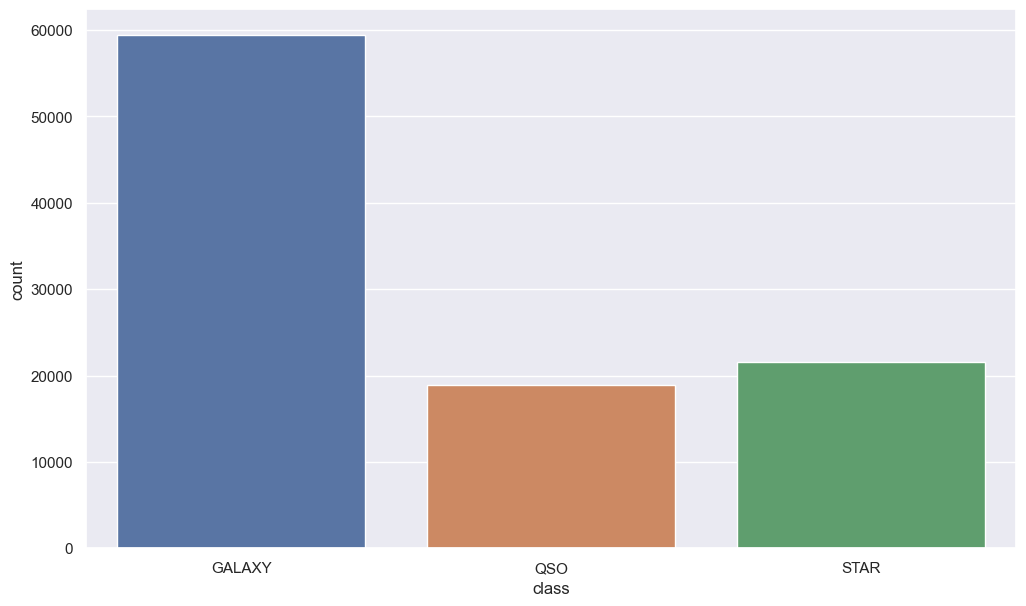

In [9]:
# Plotting different classes
sns.countplot(x=df1['class'])
plt.show()

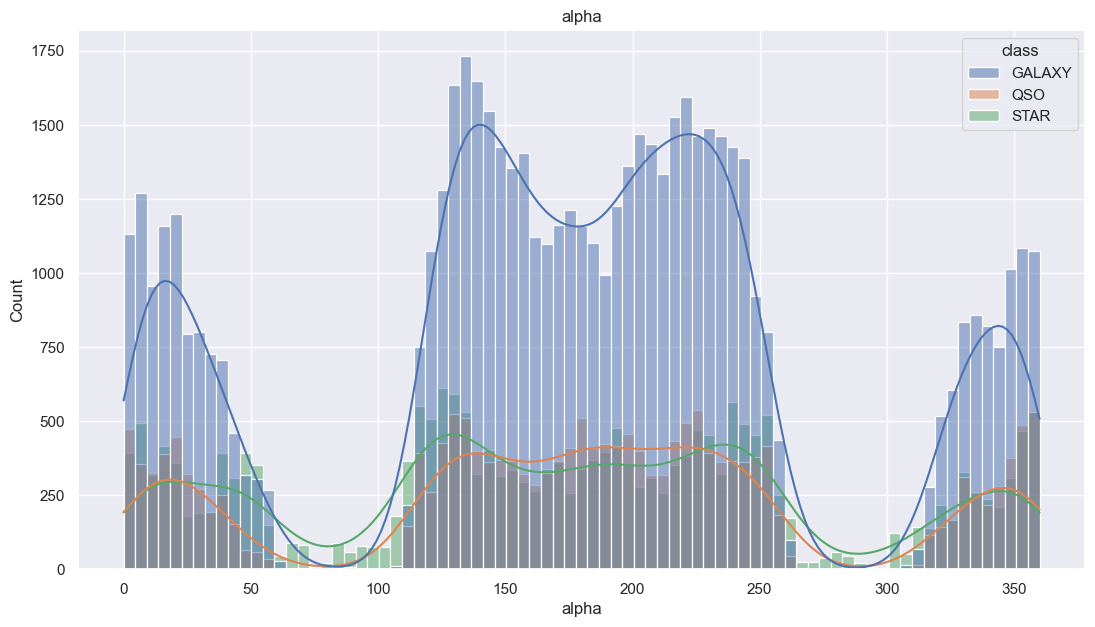

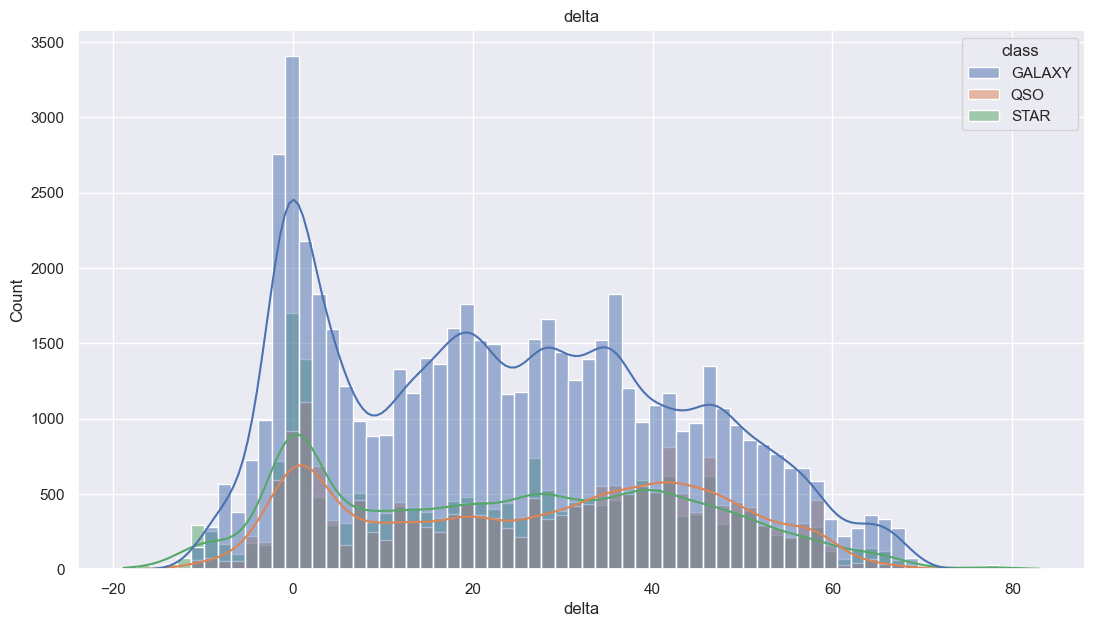

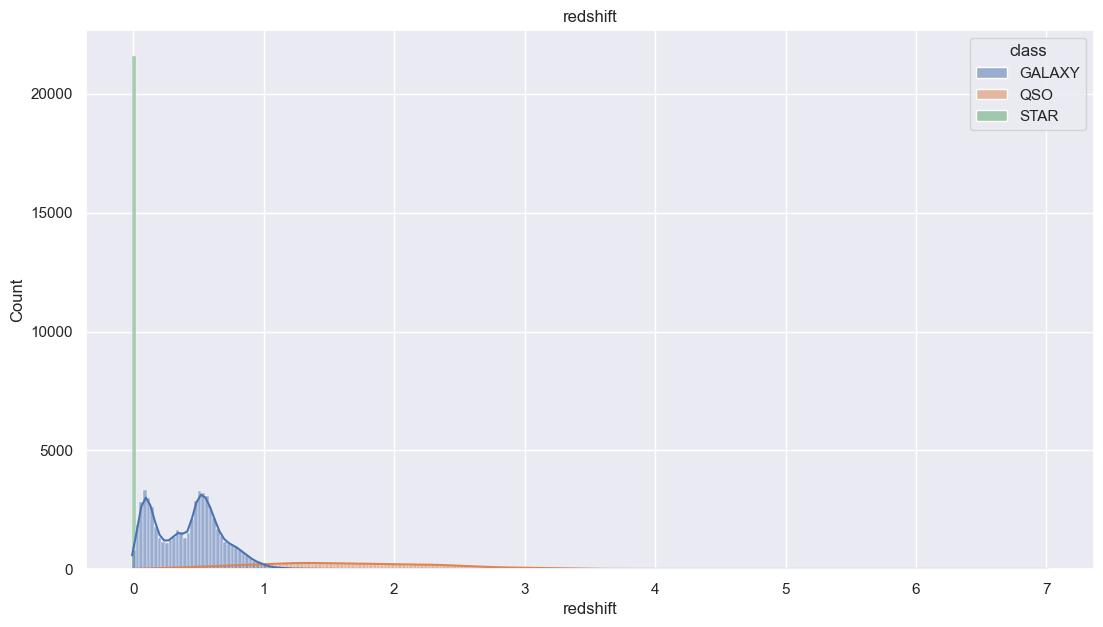

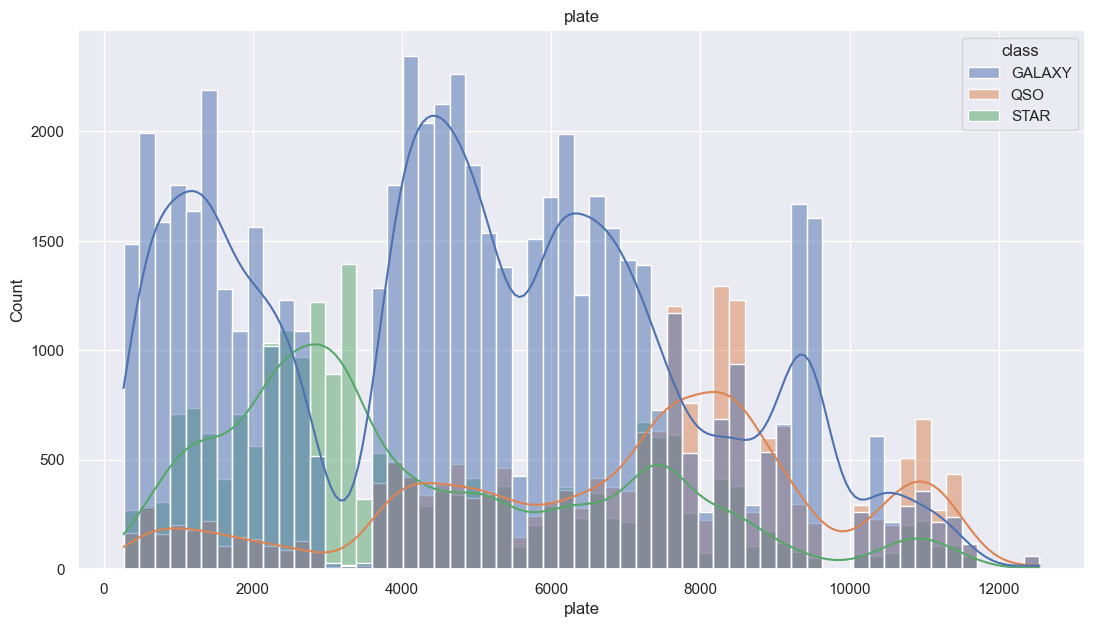

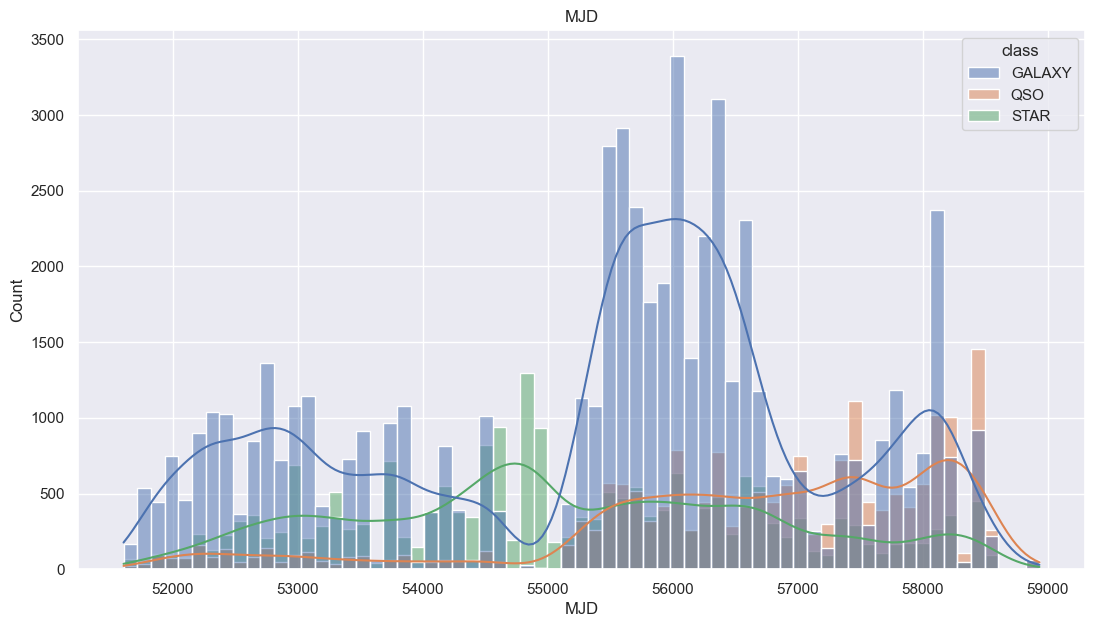

In [10]:
#We can train out models faster if we choose those features which can distinguish well between out classes.....
#As alpha, delta, u, g, r, i, z, redshift, plate, MJD are astronomical quantities, therefore, we'll keep them as our primary feature...

for i in ['alpha', 'delta','redshift', 'plate', 'MJD']:
    plt.figure(figsize=(13,7))
    sb.histplot(data=df1, x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()

In [11]:
# Finding Correlation 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['class'] = label_encoder.fit_transform(df1['class'])

correlation = df1.corr()


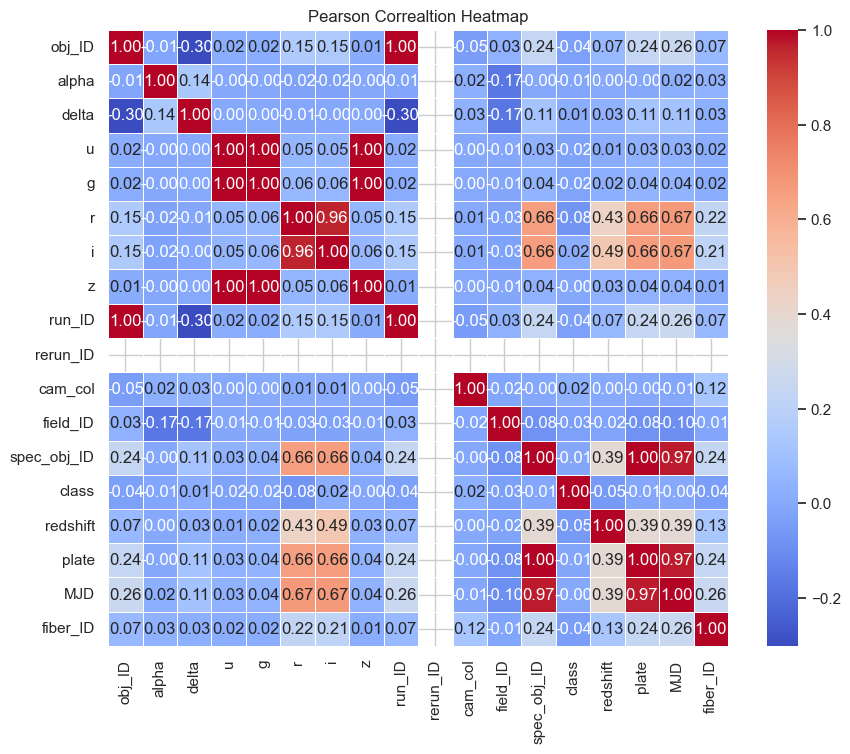

In [12]:
# Plotting heatmap for the correlation

plt.figure(figsize = (10,8))
sns.set(font_scale = 1.0)
sns.set_style("whitegrid")
sns.heatmap(correlation, annot = True, cmap = "coolwarm", cbar= True, fmt = ".2f", linewidths=0.5)
plt.title("Pearson Correaltion Heatmap")
plt.show()

In [13]:
# Now i'll use KDE to visualise the photometric filters which are u, g, r, i, z

le = LabelEncoder()
df1["class"] = le.fit_transform(df1["class"])
df1["class"] = df1["class"].astype(int)

def plot(column):
    for i in range(3):
        sb.kdeplot(data=df1[df1["class"] == i][column], label = le.inverse_transform([i]), fill = True)
    sb.kdeplot(data=df1[column],label = ["All"], fill = True)
    plt.legend()
    
def log_plot(column):
    for i in range(3):
        sb.kdeplot(data=np.log(df1[df1["class"] == i][column]), label = le.inverse_transform([i]), fill = True)
    sb.kdeplot(data=np.log(df1[column]),label = ["All"], fill = True)
    plt.legend()

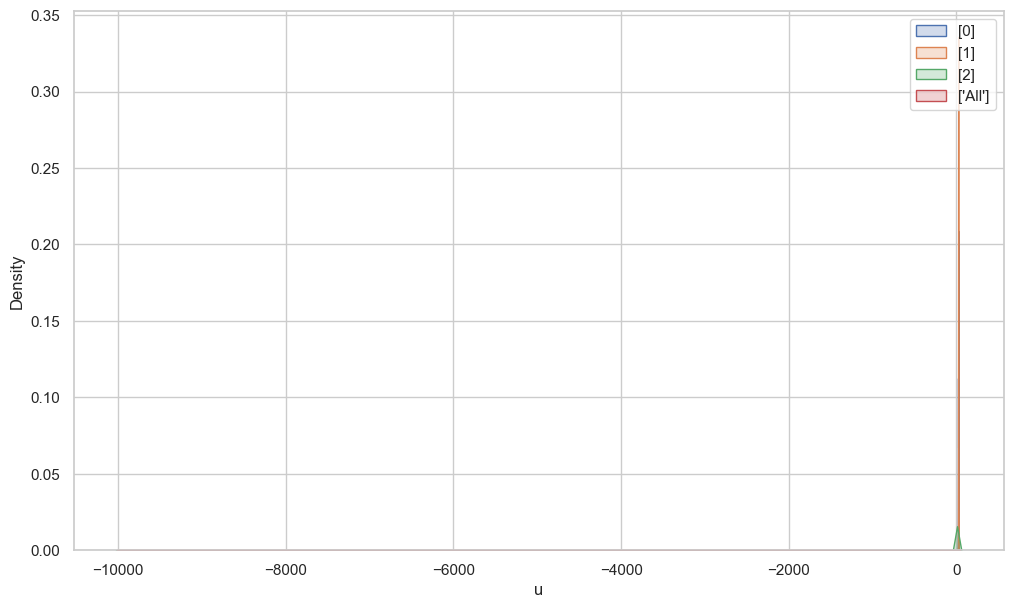

In [14]:
plot('u')

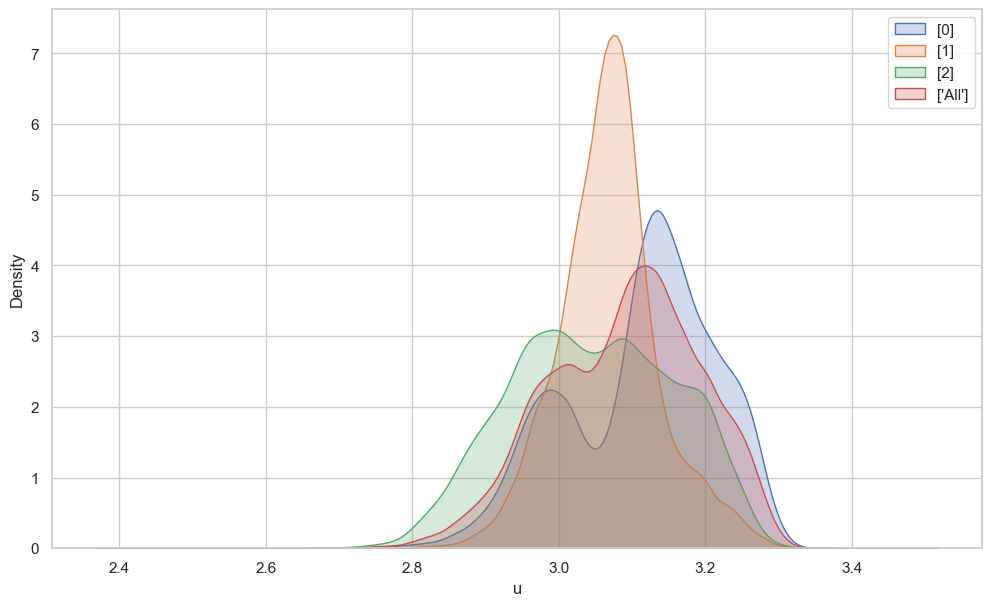

In [15]:
log_plot('u')

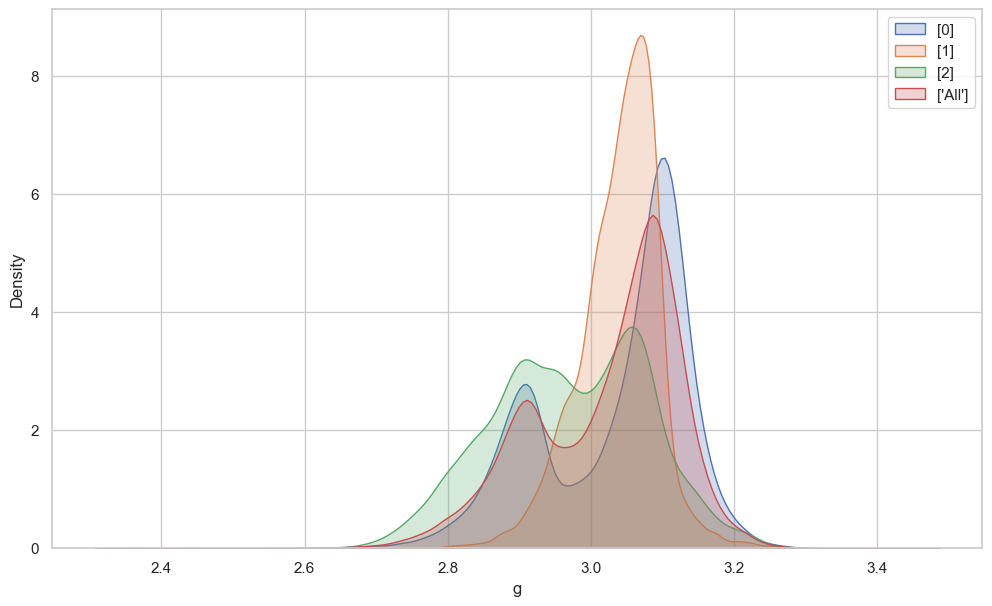

In [16]:
log_plot('g')

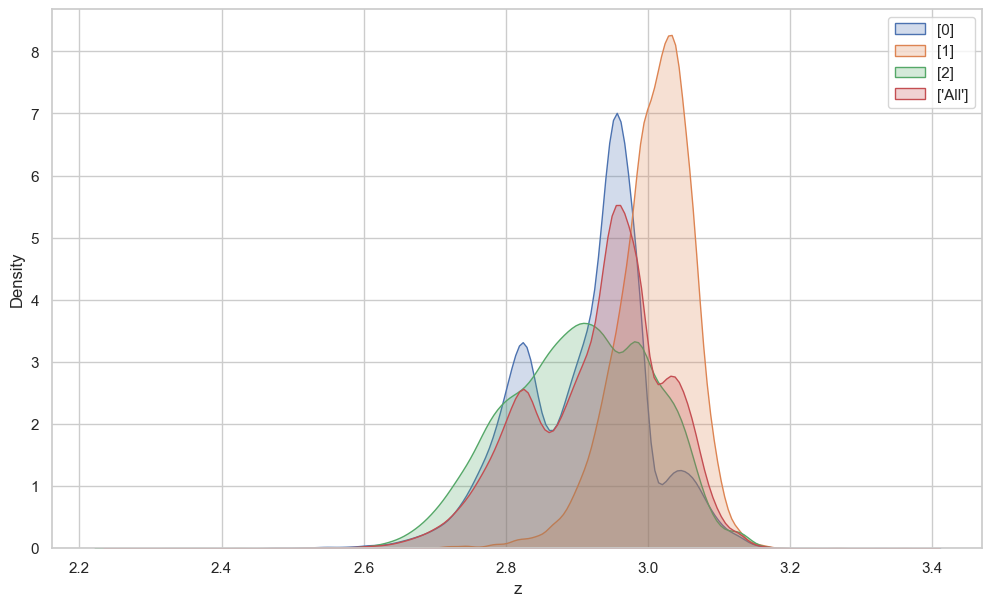

In [17]:
log_plot('z')

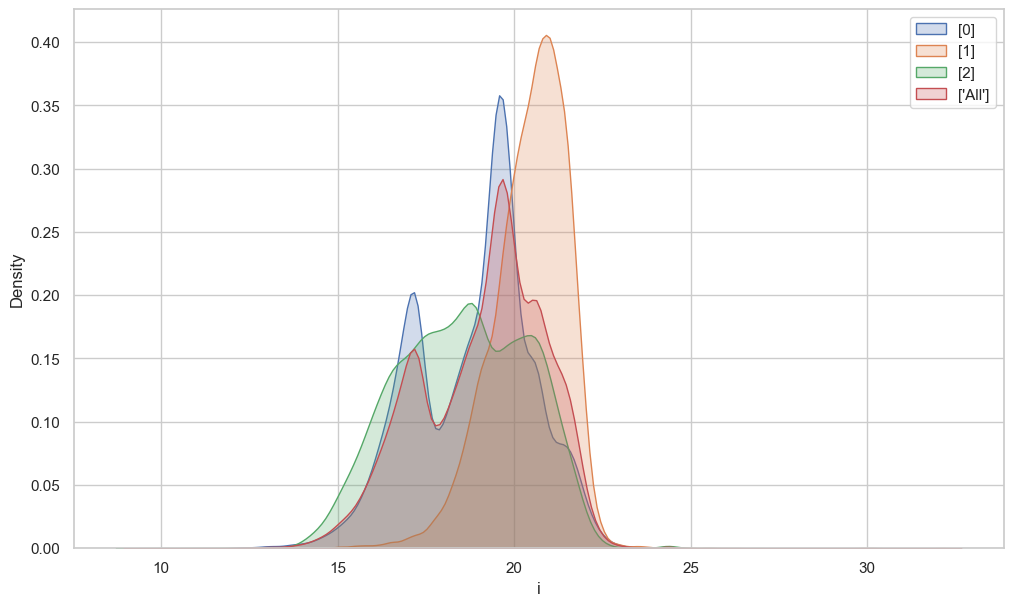

In [18]:
plot('i')

In [19]:
df1["rerun_ID"].nunique()

1

In [20]:

# id and rerun is not useful in training so we drop it

df1 = df1.drop("rerun_ID",axis=1)
df1 = df1.drop(["obj_ID"],axis=1)

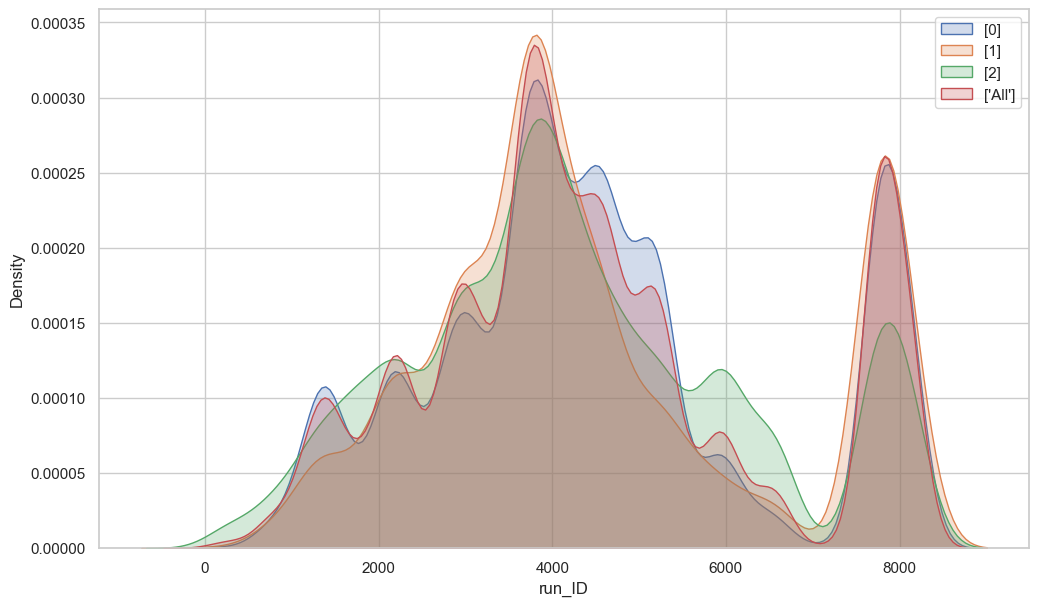

In [21]:
plot("run_ID")

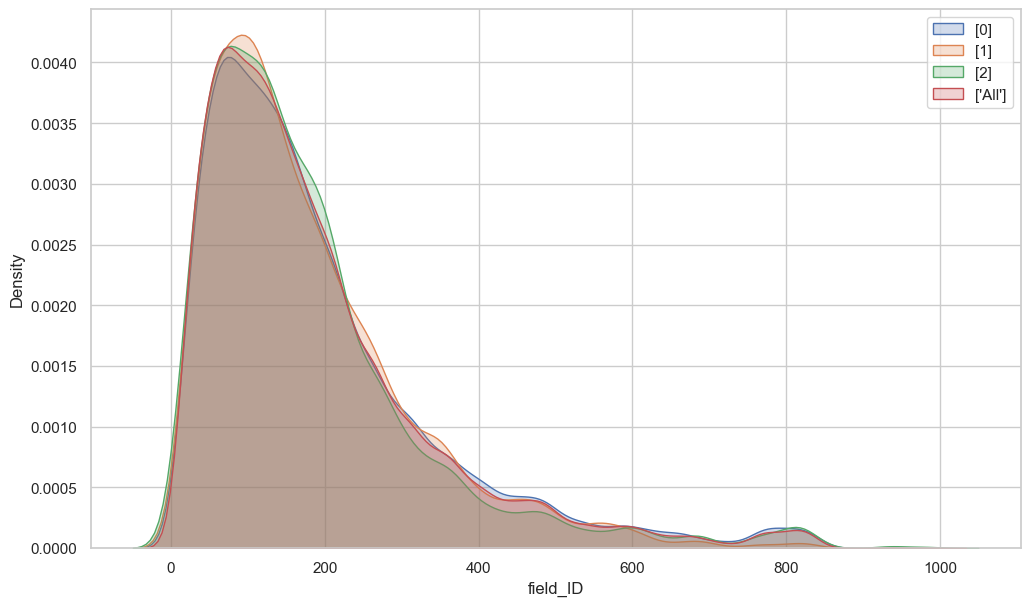

In [22]:
plot("field_ID")

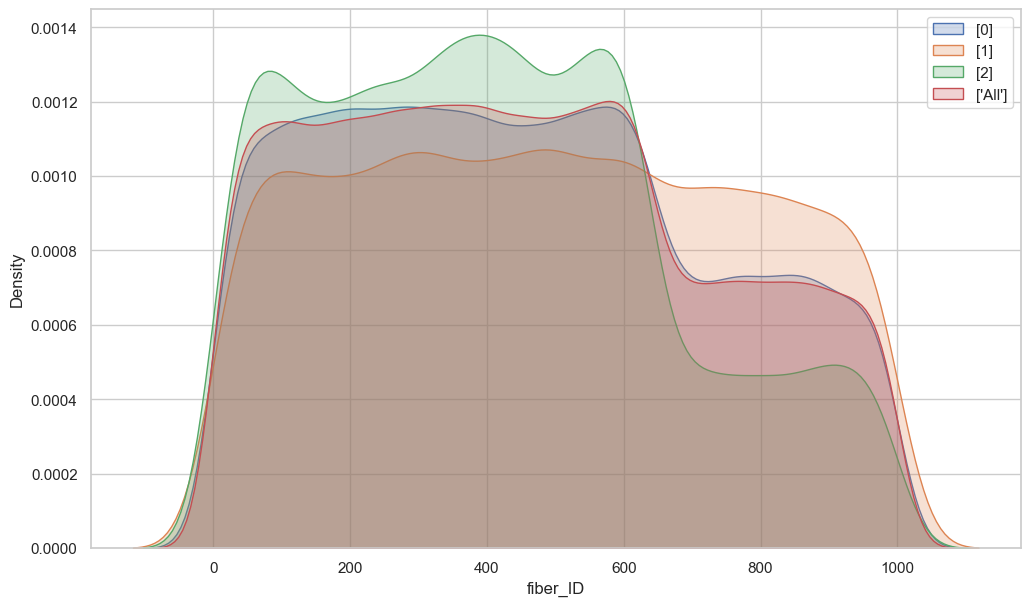

In [23]:
plot("fiber_ID")

<Axes: xlabel='cam_col', ylabel='count'>

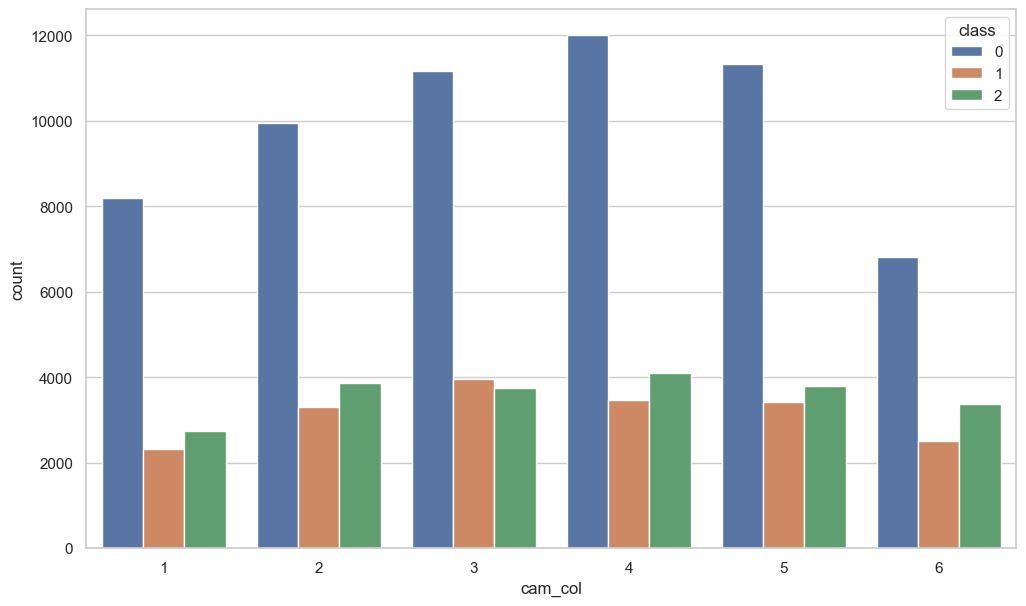

In [24]:
sns.countplot(x=df1["cam_col"],hue=df1["class"])

In [25]:
# We can see the following columns have no significant differences in distribution by class, so we drop them
df1 = df1.drop(["run_ID","field_ID","fiber_ID","cam_col"],axis=1)


In [26]:
df1.head()

,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,0,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0,0.116123,6121,56187


In [27]:
# To remove outliers if needed
def rem_outliers():
    s1 = df1.shape

    for i in df1.select_dtypes(include = 'number').columns:
        qt1 = df1[i].quantile(0.05)
        qt3 = df1[i].quantile(0.95)
        iqr =  qt3 - qt1
        lower = qt1-(1.5*iqr)
        upper = qt3+(1.5*iqr)
        min_in = df1[df1[i]<lower].index
        max_in = df1[df1[i]>upper].index
        df1.drop(min_in, inplace = True)
        df1.drop(max_in, inplace = True)
    
    s2 = df1.shape
    outliers = s1[0] - s2[0]
    return outliers

In [28]:
print("Number of outliers deleted are : ", rem_outliers())

Number of outliers deleted are :  176


In [29]:
y = df1['class']
X = df1.drop("class",axis=1)


In [30]:
# Upsampling imbalanced dataset

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, y_res = sm.fit_resample(X, y)

In [31]:
y.value_counts()

0    59444
2    21592
1    18788
Name: class, dtype: int64

In [32]:
X_res.head()

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0.116123,6121,56187


In [33]:
y_res.value_counts()

0    59444
1    59444
2    59444
Name: class, dtype: int64

In [34]:
df1.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'spec_obj_ID', 'class',
       'redshift', 'plate', 'MJD'],
      dtype='object')

In [35]:
df_upsampled = pd.DataFrame(X_res, columns=X.columns)
df_upsampled['class'] = y_res


In [36]:
df_upsampled.head()


,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0.634794,5812,56354,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0.779136,10445,58158,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,0.644195,4576,55592,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0.932346,9149,58039,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0.116123,6121,56187,0


In [ ]:
#DECISION TREE 

In [ ]:
data = df1.drop('class',axis =1)
target=df1["class"]
from sklearn.model_selection import train_test_split

# Split data into training and test, if test size is not specified, default value  of 0.25 is applied
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_full = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

dt_full.fit(X_train, y_train)
dt_full.score(X_train, y_train), dt_full.score(X_test, y_test)

(1.0, 0.9736670928380773)

<BarContainer object of 11 artists>

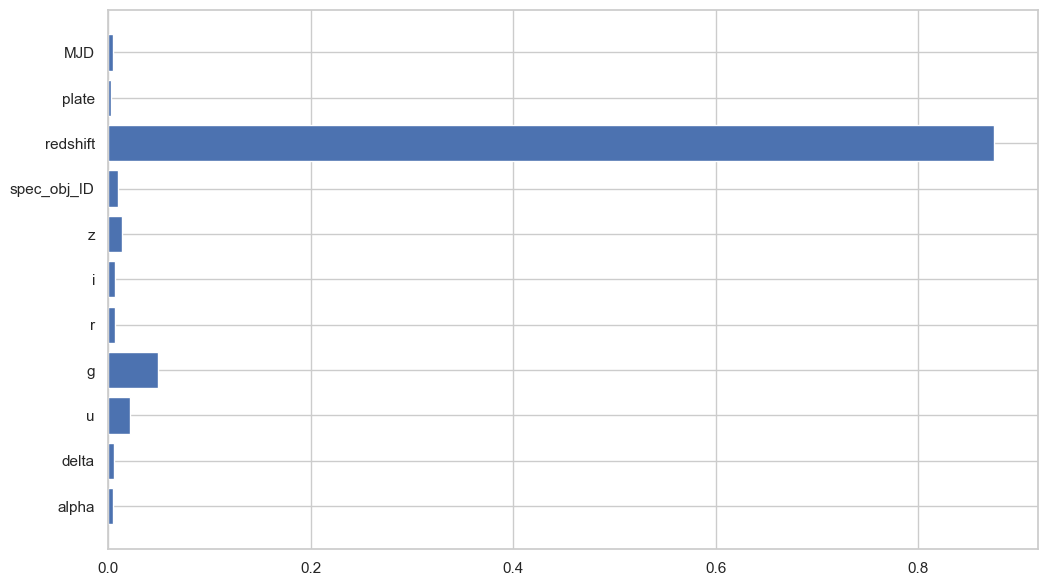

In [ ]:
# 100% training accuracy is never good: overfitting concern in our case
# lets see feature importance first 
dt_y = dt_full.feature_importances_ # 0s: variable dropped
dt_x = data.columns.tolist()
plt.barh(dt_x, dt_y)

In [ ]:
# the following code make take a long time to process so use the other cell with only 10% of data 

In [ ]:
# GridSearch + CV

from sklearn.model_selection import GridSearchCV

opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# go through all possible combinations: 9*9*9 models, with 5 fold cv
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), # improper way to specify, should be a larger number
             'max_leaf_nodes':    range(2,11)   }

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
sampled_data = df1.sample(frac=0.10, random_state=42)  # You can adjust the fraction as needed

data = sampled_data.drop('class', axis=1)
target = sampled_data['class']

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

opt_tree = DecisionTreeClassifier(random_state=0)

dt_params = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 11),
    'max_leaf_nodes': range(2, 11)
}

grid_tree = GridSearchCV(opt_tree, dt_params, cv=5)  # Use 5-fold cross-validation
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [ ]:
# Report the best hyperparameters chosen
grid_tree.best_params_

{'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 2}

In [ ]:
from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_)) # inside bracket, can be dt_3, dt_full, etc.


|--- feature_8 <= 0.00
|   |--- class: 2
|--- feature_8 >  0.00
|   |--- feature_8 <= 0.94
|   |   |--- feature_6 <= 19.78
|   |   |   |--- feature_8 <= 0.78
|   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.78
|   |   |   |   |--- feature_3 <= 20.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  20.67
|   |   |   |   |   |--- class: 0
|   |   |--- feature_6 >  19.78
|   |   |   |--- feature_3 <= 21.85
|   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  21.85
|   |   |   |   |--- class: 0
|   |--- feature_8 >  0.94
|   |   |--- feature_3 <= 22.40
|   |   |   |--- class: 1
|   |   |--- feature_3 >  22.40
|   |   |   |--- feature_8 <= 1.23
|   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  1.23
|   |   |   |   |--- class: 1



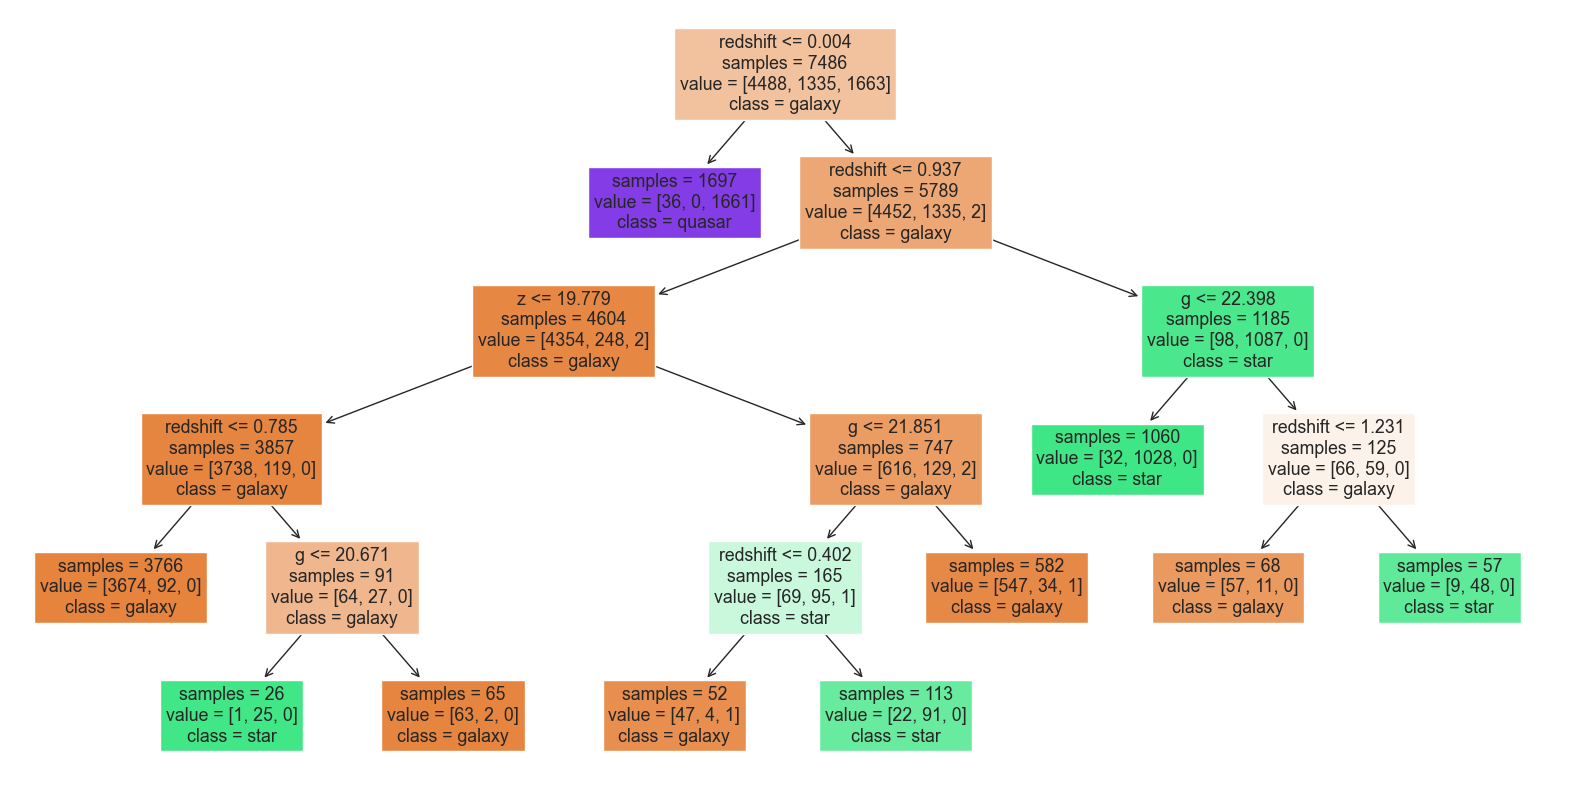

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(20,10))


class_names = ['galaxy', 'star', 'quasar']

tree.plot_tree(
    grid_tree.best_estimator_,
    feature_names=dt_x,  # Replace dt_x with your feature names
    class_names=class_names,  # Use your actual class names here
    filled=True,
    impurity=False
)

plt.show()


In [ ]:
dt_custom = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_split=2, random_state=0)

# Train the model on the training data
dt_custom.fit(X_train, y_train)

# Calculate accuracy on the training set
train_accuracy_custom = dt_custom.score(X_train, y_train)

# Calculate accuracy on the test set
test_accuracy_custom = dt_custom.score(X_test, y_test)

print("Custom Parameters - Training Accuracy:", train_accuracy_custom)
print("Custom Parameters - Test Accuracy:", test_accuracy_custom)

Custom Parameters - Training Accuracy: 0.9672722415174994
Custom Parameters - Test Accuracy: 0.9663461538461539


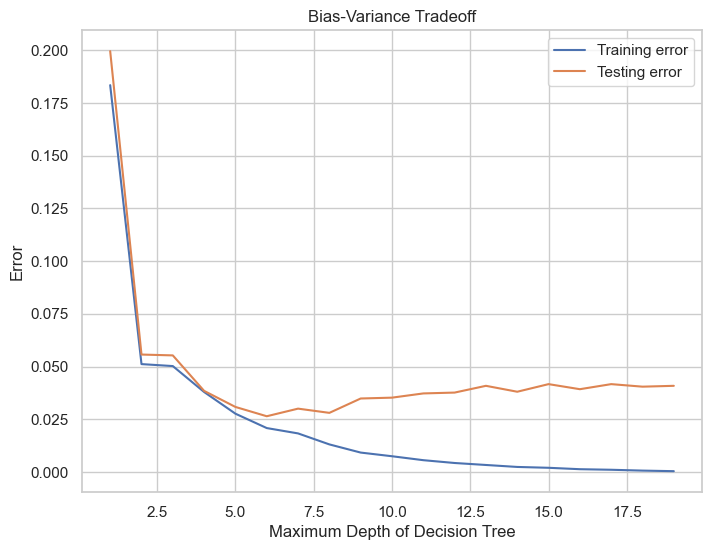

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Define lists to store errors
train_errors = []
test_errors = []

# Vary the max_depth parameter to observe the bias-variance tradeoff
depths = range(1, 20)  # Vary the depth from 1 to 19

for depth in depths:
    # Initialize and train the DecisionTreeClassifier with specific depth
    dt_custom = DecisionTreeClassifier(max_depth=depth)
    dt_custom.fit(X_train, y_train)
    
    # Calculate training error
    train_errors.append(1 - dt_custom.score(X_train, y_train))
    
    # Calculate testing error
    test_errors.append(1 - dt_custom.score(X_test, y_test))

# Plotting the bias-variance tradeoff
plt.figure(figsize=(8, 6))
plt.plot(depths, train_errors, label='Training error')
plt.plot(depths, test_errors, label='Testing error')
plt.xlabel('Maximum Depth of Decision Tree')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# X and y represent the features and target variable for the entire dataset
X = df1.drop('class', axis=1)
y = df1['class']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500, max_features=4, min_samples_split=5, random_state=1)

# Train (fit) the Random Forest model on the training data
rf.fit(X_train, y_train)



In [ ]:
print("The training accuracy is: {:.2f}%".format(rf.score(X_train, y_train) * 100))
print("The test accuracy is: {:.2f}%".format(rf.score(X_test, y_test) * 100))

The training accuracy is: 99.90%
The test accuracy is: 97.61%


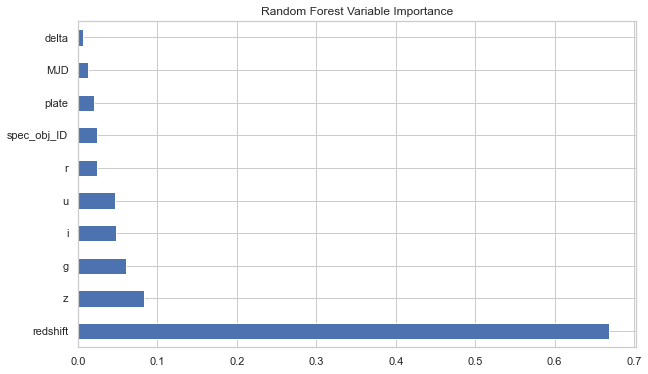

In [ ]:
# Variable Importance Plot for Random Forest
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Variable Importance')
plt.show()

In [ ]:
# Predict the target variable for the validation set
rf_pred = rf.predict(X_test)
rf_pred


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Assuming y_test and rf_pred are your true labels and predicted labels, respectively
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix for Random Forest:\n", rf_conf_matrix)

Confusion Matrix for Random Forest:
 [[11728   158    18]
 [  295  3482     1]
 [    6     0  4277]]


In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, display_labels=df1['class'].unique())
plt.title('Random Forest Confusion Matrix')
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
### Support Vector Machine

In [37]:
from sklearn.model_selection import train_test_split


In [49]:
# Assuming 'df1' is your dataset
# X and y represent the features and target variable for the entire dataset

# Extract features and target variable for the entire dataset
X = df1.drop('class', axis=1)
y = df1['class']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)


In [38]:
# Linear SVC 
from sklearn.svm import SVC

In [ ]:
# CPU available
import os
n_cpu = os.cpu_count()
n_cpu

8

In [40]:
# Kernel SVC 

# Define Function
svc = SVC(kernel='rbf', C= 0.01, gamma=0.001, random_state = 22)
svc.fit(X_train, y_train)

In [43]:
# Kernel SVC with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define Function
svc = SVC(kernel='rbf', random_state = 22) # must specify random state here

# Define a list of hyperparameters
param_svc_kernel = {'C': [0.001, 0.01, 0.1, 1, 10]  ,
                    'gamma': [0.0001,0.001,0.01,0.1,1,10]     }

# a large C approximates hard margin SVM scenario

grid_lrsvc = GridSearchCV(svc, param_svc_kernel, n_jobs = 2)

grid_lrsvc.fit(X_train, y_train)

In [45]:
# RUN THIS KERNEL TO USE SMALLER DATASET

from sklearn.model_selection import GridSearchCV

svc_df1= df_upsampled.sample(frac=0.1, random_state=42)  # You can adjust the fraction as needed

# Extract features and target variable for the entire dataset
X = svc_df1.drop('class', axis=1)
y = svc_df1['class']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)


# Define Function
kernel_svc = SVC(kernel='rbf', random_state = 22) # must specify random state here

# Define a list of hyperparameters
param_svc_kernel = {'C': [0.00001,0.0001]  ,
                    'gamma': [0.005,0.0001,0.001]     }

# a large C approximates hard margin SVM scenario

grid_lrsvc = GridSearchCV(kernel_svc, param_svc_kernel, n_jobs = 2)

grid_lrsvc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=22), n_jobs=2,
             param_grid={'C': [1e-05, 0.0001], 'gamma': [0.005, 0.0001, 0.001]})

In [46]:
grid_lrsvc.best_params_

{'C': 1e-05, 'gamma': 0.005}

In [47]:
##grid_lrsvc.score(X_test, y_test)

# Get the best-fit model
best_model = grid_lrsvc.best_estimator_

# Get the training score of the best-fit model
train_score = best_model.score(X_train, y_train)

# Get the test score of the best-fit model
test_score = best_model.score(X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

Training Score: 0.3385404149643515
Test Score: 0.33794392523364486


In [ ]:
## Linear SVC with GridSearchCV with seven hyperparameters. This code has best parameter as 0.001 but the accuracy doesn't improve significantly therefore we will go with 5 parameters
##from sklearn.model_selection import GridSearchCV

# Define Function
##linear_svc = LinearSVC(random_state = 22) # must specify random state here

# Define a list of hyperparameters
## params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000 ]   }

# a large C approximates hard margin SVM scenario

##grid_lrsvc = GridSearchCV(linear_svc, params_svc, n_jobs = 2)

##grid_lrsvc.fit(X_train, y_train)
## The score for this with 7 parameters is almost the same as the one with 5 parameters 
##Training Score: 0.5959127597458355
##Test Score: 0.5944971283558167

In [ ]:
## SVM with kernel RBF [radial basis function]


In [50]:
## SVm kernel RBF with default hyperparameters
from sklearn.svm import SVC
svm_base = SVC(random_state = 0, kernel = 'rbf')
svm_base.fit(X_train, y_train)
svm_base.score(X_test, y_test)

0.5944971283558167

In [ ]:
## This code is used for SVM kernal rbf with hyperparameter tuning 
##from sklearn.svm import SVC
##from sklearn.model_selection import GridSearchCV
# Define Function
## svc = SVC(random_state = 0, kernel = 'rbf')

#define a list of parameters
##param_svc_kernel = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000]  ,
##                    'gamma': [0.0001, 0.001,0.01,0.1,1,10]     } # C = 10,000 mimics hard-margin SVM

#apply grid search
##grid_svc = GridSearchCV(svc, param_svc_kernel, cv = 5, n_jobs=2)

##grid_svc.fit(X_train, y_train)

In [ ]:
## We were not able to run this code with kernel rbf hence we did linear svm and rbf kernel with default parameter.
## The accuracy of both these models is not great.
